# Running *species*

This tutorial shows what a typical workflow with [species](https://species.readthedocs.io/en/latest/species.html) looks like. We will compare the colors and magnitudes of a few directly imaged companions with those of field dwarfs from the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html).

## Initiating *species*

We start by importing the [species](https://species.readthedocs.io/en/latest/species.html) toolkit.

In [1]:
import species

Next, the [configuration file](https://species.readthedocs.io/en/latest/configuration.html) (*species_config.ini*) is read from the working folder. Since the file does not exist, it is created with default values for the path of the HDF5 database and the location where the external data is stored. The database and data folder are also created since this is the first time that we run [species](https://species.readthedocs.io/en/latest/species.html) with the current configuration file. 

In [2]:
species.SpeciesInit()

species v0.5.5
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_config.ini... [DONE]
Configuration settings:
   - Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
   - Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding a photometric library

A [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) object is now created, which can be used for importing data from the chosen data folder into the database.

In [3]:
database = species.Database()

The photometric data and parallaxes from the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html) are downloaded and added to the database with the [add_photometry](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_photometry) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database).

In [4]:
database.add_photometry('vlm-plx')

100%|████████████████████████████████████████| 314k/314k [00:00<00:00, 177MB/s]

Adding Database of Ultracool Parallaxes...

 [DONE]


## Adding companion data

A library of magnitudes and parallaxes of directly imaged companions are available in the [companion_data](https://github.com/tomasstolker/species/blob/master/species/data/companion_data.json) file. These can be added to the [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) with the [add_companion](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_companion) method (alternatively, photometric data of individual objects can be manually imported with [add_object](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_object)). In this example, we add the distance and magnitudes of 51 Eri b, beta Pic b, and PZ Tel B to the database. This will automatically download the filter profiles and a flux calibrated spectrum of Vega. These are required for the flux calibration of the companion magnitudes.

In [5]:
database.add_companion('51 Eri b', verbose=False)
database.add_companion('beta Pic b', verbose=False)
database.add_companion('PZ Tel B', verbose=False)

Adding filter: MKO/NSFCam.J... [DONE]
Adding filter: MKO/NSFCam.H... [DONE]
Adding filter: MKO/NSFCam.K... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_B_H... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Adding filter: Keck/NIRC2.Lp... [DONE]
Adding filter: Keck/NIRC2.Ms...

 [DONE]


100%|████████████████████████████████████████| 288k/288k [00:00<00:00, 203MB/s]

Adding Vega spectrum... [DONE]
Reference: Bohlin et al. 2014, PASP, 126
URL: https://ui.adsabs.harvard.edu/abs/2014PASP..126..711B/abstract
Adding object: 51 Eri b

 [DONE]
Adding filter: Magellan/VisAO.Ys... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Gemini/NICI.ED286... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.NB374... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.NB405... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding object: beta Pic b [DONE]
Adding filter: Paranal/SPHERE.ZIMPOL_R_PRIM... [DONE]
Adding filter: Paranal/SPHERE.ZIMPOL_I_PRIM...

/Users/tomasstolker/applications/species/species/data/database.py:1283: UserWarning: Found 33 fluxes with NaN in the data of GPI_YJHK. Removing the spectral fluxes that contain a NaN.
  warnings.warn(


 [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Adding filter: Gemini/NIRI.H2S1v2-1-G0220... [DONE]
Adding object: PZ Tel B [DONE]


## Reading color-magnitude data

The colors and magnitudes from the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html) are read from the database in the working folder by first creating an instance of [ReadColorMagnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_color.ReadColorMagnitude).

In [6]:
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=('MKO/NSFCam.J', 'MKO/NSFCam.H'),
                                      filter_mag='MKO/NSFCam.J')

The data of the field dwarfs are now read with the [get_color_magnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_color.ReadColorMagnitude.get_color_magnitude) method. This returns a [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) with the requested data.

In [7]:
colorbox = colormag.get_color_magnitude(object_type='field')

We also create a list with the color and magnitude filter names that we want to extract for the directly imaged companions.

In [8]:
objects = [('51 Eri b', 'MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.J'),
           ('beta Pic b', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J'),
           ('PZ Tel B', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J')]

## Plotting a color-magnitude diagram

We will now combine the selected data in a color-magnitude diagram. The [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) is provided in a list to the [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function. The list with directly imaged objects is provided as argument of `objects`. We also add a reddening vector to show how the color changes for a size distribution of enstatite grains with a geometric mean radius of 0.1 $\mu$m and an extinction in the $J$ band of 1 mag. The discrete colorbar shows the spectral types of the field dwarfs and the directly imaged objects are labeled individually.

Unpacking optical constants... [DONE]
Adding optical constants of MgSiO3... [DONE]
Adding optical constants of Fe... [DONE]
Adding log-normal dust cross sections:
   - Data shape (n_wavelength, n_radius, n_sigma): (67, 20, 20)
   - Wavelength range: 0.4 - 10.0 um
   - Mean geometric radius range: 0.001 - 10.0 um
   - Geometric standard deviation range: 1.0 - 10.0
Adding power-law dust cross sections
   - Data shape (n_wavelength, n_radius, n_exponent): (132, 50, 50)
   - Wavelength range: 0.4 - 10.0 um
   - Maximum grain radius range: 0.01 - 100.0 um
   - Power-law exponent range: -10.0 - 10.0
Plotting color-magnitude diagram...

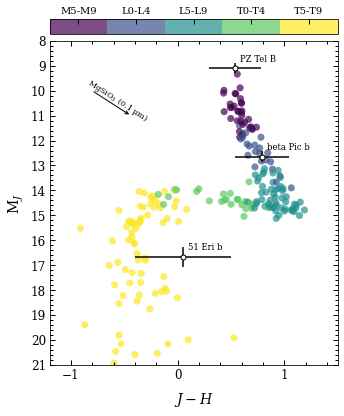

 [DONE]


In [9]:
fig = species.plot_color_magnitude(boxes=[colorbox, ],
                                   objects=objects,
                                   reddening=[(('MKO/NSFCam.J', 'MKO/NSFCam.H'), ('MKO/NSFCam.J', 1.), 'MgSiO3', 0.1, (-0.8, 10.))],
                                   label_x=r'$J - H$',
                                   label_y=r'M$_J$',
                                   xlim=(-1.2, 1.5),
                                   ylim=(21., 8.),
                                   offset=(-0.08, -0.08),
                                   companion_labels=True,
                                   field_range=('late M', 'late T'),
                                   legend=None,
                                   output=None)

The [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function returned the [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object of the plot. The functionalities of [Matplotlib](https://matplotlib.org/stable/index.html) can be used for further customization of the plot. For example, the axes of the plot are stored at the `axes` attribute of `Figure`.

In [10]:
fig.axes

[<Axes: xlabel='$J - H$', ylabel='M$_J$'>, <Axes: >]